In [564]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipykernel import kernelapp as app

In [306]:
# Q1
batting = pd.read_csv('batting.csv')
# Q2
batting.shape

(102816, 25)

In [307]:
# Q2
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

In [308]:
# Q3 3)	How many players have hit 40 or more HRs in one single season?

batting3 = batting.groupby(['playerID','yearID','nameFirst','nameLast'], as_index = False).sum()
batting3.loc[batting3['HR'] >=40 ,'playerID'].nunique()

142

In [309]:
# Q4 How many players have hit 600 or more HRs for their career?

batting4 = batting.groupby(['playerID','nameFirst','nameLast'],as_index=True).sum()
batting4[batting4['HR']>=600]['HR'].reset_index()

,playerID,nameFirst,nameLast,HR
0,aaronha01,Hank,Aaron,755
1,bondsba01,Barry,Bonds,762
2,griffke02,Ken,Griffey,630
3,mayswi01,Willie,Mays,660
4,rodrial01,Alex,Rodriguez,696
5,ruthba01,Babe,Ruth,714
6,sosasa01,Sammy,Sosa,609
7,thomeji01,Jim,Thome,612


In [310]:
# Q5 How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season?
batting5 = batting.groupby(['playerID','yearID'], as_index = False).sum()
batting5.loc[((batting5['2B'] >=40) & (batting5['3B'] >= 10) & (batting5['H'] >=200) & (batting5['HR'] >= 30)) ,'playerID'].nunique()

11

In [323]:
# Q6 How many players seasons have had 100 or more SBs?
batting6 = batting.groupby(['playerID','nameFirst','nameLast','yearID'], as_index = True).sum()
batting6[batting6['SB'] >= 100]['SB'].reset_index().sort_values(by='SB', ascending = False).reset_index(drop = True)

,playerID,nameFirst,nameLast,yearID,SB
0,nicolhu01,Hugh,Nicol,1887,138.0
1,henderi01,Rickey,Henderson,1982,130.0
2,lathaar01,Arlie,Latham,1887,129.0
3,brocklo01,Lou,Brock,1974,118.0
4,comisch01,Charlie,Comiskey,1887,117.0
5,hamilbi01,Billy,Hamilton,1889,111.0
6,wardjo01,John,Ward,1887,111.0
7,hamilbi01,Billy,Hamilton,1891,111.0
8,colemvi01,Vince,Coleman,1985,110.0
9,colemvi01,Vince,Coleman,1987,109.0


In [327]:
# Q7 How many players in the 1960s (yearID) have hit 200 or more HRs?

batting7 = batting[(batting['yearID']>=1960) & (batting['yearID'] <= 1969)]
batting7_1 = batting7.groupby(['playerID','nameFirst','nameLast'],as_index=True).sum()
batting7_1[batting7_1['HR']>=200].sort_values(by = 'HR', ascending = False)['HR'].reset_index()

,playerID,nameFirst,nameLast,HR
0,killeha01,Harmon,Killebrew,393
1,aaronha01,Hank,Aaron,375
2,mayswi01,Willie,Mays,350
3,robinfr02,Frank,Robinson,316
4,mccovwi01,Willie,McCovey,300
5,howarfr01,Frank,Howard,288
6,cashno01,Norm,Cash,278
7,bankser01,Ernie,Banks,269
8,mantlmi01,Mickey,Mantle,256
9,cepedor01,Orlando,Cepeda,254


In [336]:
# Q8 Who has hit the most HRs in history?

batting8 = batting.groupby(['playerID','nameFirst','nameLast'],as_index=True)['HR'].sum().reset_index()
batting8.sort_values(by ='HR',ascending = False).head(1)

#batting8[batting8['HR'] == batting8['HR'].max()]['HR'].reset_index()

,playerID,nameFirst,nameLast,HR
1542,bondsba01,Barry,Bonds,762


In [340]:
# Q9 Who had the most hits (H) in the 1970s?

batting9 = batting[(batting['yearID']>=1970) & (batting['yearID'] <= 1979)]
batting9_1 = batting9.groupby(['playerID','nameFirst','nameLast'],as_index=True)['H'].sum().reset_index()
batting9_1.sort_values(by = 'H' , ascending = False).head(1)

#batting9_1[batting9_1['H'] == batting9_1['H'].max()]['H'].reset_index()

,playerID,nameFirst,nameLast,H
1639,rosepe01,Pete,Rose,2045


In [432]:
# Q10 Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?

#batting10 = batting[batting['yearID'] == 1977]
batting10['PA'] = batting10['AB'] + batting10['BB'] + batting10['HBP'] + batting10['SF']
batting10_1 = batting10[(batting10['PA']>=500) & (batting['yearID'] == 1977)]
batting10_1['OBP'] = (batting10_1['H'] + batting10_1['BB'] + batting10_1['HBP'])/ batting10_1['PA']
batting10_1.nlargest(5, 'OBP')[['nameFirst' ,'nameLast' ,'OBP']]

c:\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
c:\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,nameFirst,nameLast,OBP
54603,Rod,Carew,0.448773
55273,Ken,Singleton,0.437788
55280,Reggie,Smith,0.426910
54820,Mike,Hargrove,0.420312
55095,Joe,Morgan,0.417054


In [369]:
# Q11 Top 8 highest averages in 2013 with at least 300 PAs

batting['PA'] = batting['AB'] + batting['BB'] + batting['HBP'] + batting['SF']
batting['Avg'] = batting['H'] / batting['AB']
batting['OBP'] = (batting['H'] + batting['BB'] + batting['HBP'])/ batting['PA'] 
batting
batting11 = batting[(batting['PA'] >= 300) & (batting['yearID'] == 2013)]
batting11.nlargest(8, 'Avg')[['nameFirst' ,'nameLast' ,'Avg']]


,nameFirst,nameLast,Avg
97188,Miguel,Cabrera,0.347748
98062,Hanley,Ramirez,0.345395
97300,Michael,Cuddyer,0.331288
97825,Joe,Mauer,0.323596
98293,Mike,Trout,0.322581
97651,Chris,Johnson,0.321012
97437,Freddie,Freeman,0.319419
98043,Yasiel,Puig,0.319372


In [370]:
# Q12 Leaders in hits from 1940 up to and including 1949 

batting12 = batting[(batting['yearID']>=1940) & (batting['yearID'] <= 1949)]
batting12_1 = batting12.groupby(['playerID','nameFirst','nameLast'],as_index=True).sum()
batting12_1['H'].reset_index().sort_values(by ='H', ascending = False).nlargest(10, 'H').reset_index(drop = True)

,playerID,nameFirst,nameLast,H
0,boudrlo01,Lou,Boudreau,1578
1,elliobo01,Bob,Elliott,1563
2,walkedi02,Dixie,Walker,1512
3,musiast01,Stan,Musial,1432
4,doerrbo01,Bobby,Doerr,1407
5,holmeto01,Tommy,Holmes,1402
6,applilu01,Luke,Appling,1376
7,nichobi01,Bill,Nicholson,1328
8,marioma01,Marty,Marion,1310
9,cavarph01,Phil,Cavarretta,1304


In [472]:
# Q13 Who led MLB with the most hits the most times?  And how many times?

batting13 = batting.groupby(['playerID','yearID','nameFirst','nameLast'],as_index=True)[['H']].sum().reset_index()
batting13_1 = batting13.sort_values(['yearID','H'], ascending = [False,False]).drop_duplicates(['yearID'])
batting13_1 = batting13.sort_values(by ='H', ascending=False).drop_duplicates(['yearID'])
batting13_1['playerID'].value_counts().head(1)

#batting13_1.sort_values(by = 'playerID', ascending = False)
#batting13_1.groupby('playerID').count().reset_index().sort_values(by = 'yearID', ascending = False)
#batting13_1['playerID'].count_values()
#batting13_1.groupby('playerID').sort_values(by = 'playerID', ascending = False)
#batting13_1

#batting13_1 = batting13.groupby('yearID',as_index=False)[['H']].max()
#batting13_2=pd.merge(batting13,batting13_1,on=['yearID','H'],how='right')
#most_hits=batting13_2.groupby('playerID',as_index=False)[['yearID']].count().rename(columns={'yearID':'Number_of_times'}).sort_values(by=['Number_of_times'],ascending=False).reset_index(drop=True)
#print(most_hits[most_hits['Number_of_times']==max(most_hits['Number_of_times'])])



suzukic01    7
Name: playerID, dtype: int64

In [385]:
# Q14 Which players have played the most games for their careers?
batting14 = batting.groupby(['playerID','nameFirst','nameLast'],as_index=True)[['G']].sum()
batting14.sort_values(by ='G', ascending = False).nlargest(5, 'G')

,,,G
playerID,nameFirst,nameLast,
rosepe01,Pete,Rose,3562
yastrca01,Carl,Yastrzemski,3308
aaronha01,Hank,Aaron,3298
henderi01,Rickey,Henderson,3081
cobbty01,Ty,Cobb,3035


In [83]:
# Q15 How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs
batting15 = batting.groupby(['playerID','nameFirst','nameLast'],as_index=False)[['H','HR']].sum()
batting15[(batting15['H'] >= 3000) & (batting15['HR'] >=500)].shape[0]

5

In [110]:
# Q16 How many HRs were hit during the entire 1988 season?

batting16 = batting.groupby(['yearID'], as_index = False).sum()
batting16[batting16['yearID'] == 1988]['HR'].item()


3180

In [386]:
# Q17 Top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs

batting17 = batting.groupby(['yearID','nameFirst','nameLast'], as_index = True).sum().reset_index()
batting17
batting17_1 = batting17[(batting17['nameFirst']== 'Wade') & (batting17['nameLast'] == 'Boggs') & (batting17['AB'] >= 500)]
batting17_1.sort_values(by = 'Avg', ascending = False).head(3)[['yearID','nameFirst','nameLast' ,'Avg']]


,yearID,nameFirst,nameLast,Avg
58678,1985,Wade,Boggs,0.367534
61568,1988,Wade,Boggs,0.366438
60602,1987,Wade,Boggs,0.362976


In [489]:
# Q18 Top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending

batting18 = batting.groupby(['playerID','yearID','nameFirst','nameLast'], as_index = False).sum()
batting18_1= batting18[batting18['yearID'] == 1995]
batting18_1['PA1'] = batting18_1['AB'] + batting18_1['BB'] + batting18_1['HBP'] + batting18_1['SF']
batting18_1['OBP1'] = (batting18_1['H'] + batting18_1['BB'] + batting18_1['HBP'])/ batting18_1['PA1']
batting18_1[batting18_1['PA1'] >=400].sort_values(by='OBP1' , ascending = False).head(10).reset_index(drop = True)[['nameFirst','nameLast','OBP1']]

#batting18

#batting18_1.sort_values(by = ['OBP'], ascending = False).nlargest(10, 'OBP')[['nameFirst','nameLast','OBP','PA','yearID']].reset_index(drop=True)
#batting['OBP'] = (batting['H'] + batting['BB'] + batting['HBP'])/ batting['PA']
#agg_df = df.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
#agg_df['OBP'] = (agg_df['H'] + agg_df['BB'] + agg_df['IBB'] + agg_df['SH'] + agg_df['SF']) / agg_df['AB']
#agg_df['PA'] = agg_df['AB'] + agg_df['BB'] + agg_df['IBB'] + agg_df['SH'] + agg_df['SF']
# Filter, sort, display
#agg_df[(agg_df['yearID'] == 1995) & (agg_df['PA'] >= 400)].sort_values(by = 'OBP', ascending = False)[0:10][['yearID', 'playerID', 'nameFirst', 'nameLast', 'OBP', 'PA']].reset_index(drop = True)


c:\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,nameFirst,nameLast,OBP1
0,Edgar,Martinez,0.478873
1,Frank,Thomas,0.454405
2,Mark,McGwire,0.440758
3,Jim,Thome,0.438061
4,Barry,Bonds,0.431496
5,Tim,Salmon,0.429467
6,Chili,Davis,0.429119
7,Dave,Magadan,0.427553
8,Chuck,Knoblauch,0.424483
9,Tim,Naehring,0.414729


In [517]:
# Q19 Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928

#batting19 = batting[((batting['yearID'] == 1922) |(batting['yearID'] == 1925) | (batting['yearID'] == 1926) | (batting['yearID'] == 1928))]
#batting19_1 = batting.groupby(['playerID','nameFirst','nameLast'], as_index = False).sum().reset_index()
#batting19
#batting19_1.sort_values(by = '3B' , ascending = False).head(1)
#batting19 = batting.groupby(['playerID','nameFirst','nameLast','yearID'], as_index = True)['3B'].sum().reset_index()

batting19 = batting[(batting['yearID'] == 1922) | (batting['yearID'] == 1925) | (batting['yearID'] == 1926) | (batting['yearID'] == 1928)].groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum().sort_values(by = '3B', ascending = False)[0:1][['playerID', 'nameFirst', 'nameLast', '3B']]
batting19





,playerID,nameFirst,nameLast,3B
1011,walkecu01,Curt,Walker,59


In [474]:
# Q20 How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases

batting20 = batting.groupby(['playerID','yearID'], as_index = False)[['HR','SB']].sum()
batting20[(batting20['HR'] >= 30) & (batting20['SB']>=30)]['playerID'].nunique()

38

In [213]:
# Q21 Who had the highest OBP is 1986 with 400 or more ABs?

batting20 = batting.groupby(['playerID','nameFirst','nameLast','yearID'], as_index = True).sum().reset_index()
batting20['PA'] = batting20['AB'] + batting20['BB'] + batting20['HBP'] + batting20['SF']
batting20['OBP'] = (batting20['H'] + batting20['BB'] + batting20['HBP'])/ batting20['PA']

batting20_1 = batting20[(batting20['yearID'] == 1986) & (batting20['AB'] >= 400)]
batting20_1.sort_values(by = 'OBP', ascending = False).head(1)[['nameFirst','nameLast','OBP']]
# batting18_1 = batting18[(batting18['yearID'] == 1986) & (batting18['AB'] >= 400)].sort_values(by = 'OBP',ascending = False)


,nameFirst,nameLast,OBP
7593,Wade,Boggs,0.45283


In [221]:
# Q22 Same question but for 1997 and only in the NL (check league ID)

batting22 = batting.groupby(['playerID','nameFirst','nameLast','yearID','lgID'], as_index = True).sum().reset_index()
batting22['PA'] = batting22['AB'] + batting22['BB'] + batting22['HBP'] + batting22['SF']
batting22['OBP'] = (batting22['H'] + batting22['BB'] + batting22['HBP'])/ batting22['PA']

batting22_1 = batting22[(batting22['yearID'] == 1997) & (batting22['lgID'] >= 'NL') & (batting22['AB'] >= 400)]
batting22_1.sort_values(by = 'OBP', ascending = False).head(1)[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
91044,Larry,Walker,0.451807


In [588]:
# Q23 Who had more than the league average HRs (for players with 500 or more ABs) in 2012

batting23 = batting[(batting['yearID'] == 2012) & (batting['AB'] >= 500)]
batting23

ALmean = batting23[batting23['lgID'] =='AL']['HR'].mean()
ALmean
NLmean = batting23[batting23['lgID'] =='NL']['HR'].mean()
NLmean

batting23_1 = batting23[(batting23['AB'] >= 500)]
batting23_2 = batting23_1.groupby(['playerID','nameFirst','nameLast','lgID'], as_index = True).sum().reset_index()
batting23_1

batting23_2 = batting23_1[(((batting23_1['lgID'] == 'AL') & (batting23_1['HR'] > ALmean)) | ((batting23_1['lgID'] == 'NL') & (batting23_1['HR'] > NLmean)))]
batting23_2 [['nameFirst','nameLast','lgID','HR','AB']].sort_values(by = 'lgID', ascending = False)


#batting23_1 = batting23.groupby(['playerID','nameFirst','nameLast','lgID'], as_index = True).sum().reset_index()
#batting23_2 = batting23_1[batting23_1['AB'] >= 500]
#ALmean = batting23_2[batting23_2['lgID'] =='AL']['HR'].mean()
#ALmean
#NLmean = batting23_2[batting23_2['lgID'] =='NL']['HR'].mean()
#NLmean
#batting23_2
#batting23 = batting[batting['yearID'] == 2012]
#ALsum = batting23
#batting.groupby(['playerID','nameFirst','nameLast','lgID'], as_index = True)[['HR','AB']].sum().reset_index()


,nameFirst,nameLast,lgID,HR,AB
96127,Bryce,Harper,NL,22,533
95918,Ian,Desmond,NL,25,513
95688,Carlos,Beltran,NL,32,547
96706,Jimmy,Rollins,NL,23,632
96646,Aramis,Ramirez,NL,27,570
96301,Adam,LaRoche,NL,33,571
96180,Matt,Holliday,NL,27,599
96461,Yadier,Molina,NL,22,505
96291,Jason,Kubel,NL,30,506
96133,Corey,Hart,NL,30,562


In [301]:
# Q24 Who is the youngest player to hit 50 or more HRs in a single season?

batting24 = batting.groupby(['yearID','nameFirst','nameLast','birthYear'], as_index = True).sum().reset_index()
batting24_1 = batting24[batting24['HR'] >= 50]
batting24_1['Age'] = batting24_1['yearID']-batting24_1['birthYear']
batting24_1.sort_values(by = 'Age', ascending = True).head(1)[['nameFirst','nameLast','HR','birthYear','yearID','Age']]

c:\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,nameFirst,nameLast,HR,birthYear,yearID,Age
83243,Prince,Fielder,50,1984,2007,23


In [431]:
# Q25 Who are the five youngest players to hit 300 or more HRs for their career?

batting25 = batting.groupby(['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID']).sum().groupby(level=0).cumsum().reset_index()
batting25

batting25 = batting25[batting25['HR'] >= 300].sort_values(by = ['yearID', 'birthYear', 'playerID'])[['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID', 'HR']]
batting25['AgeDuringSeason'] = batting25['yearID'] - batting25['birthYear']
batting25.sort_values(by = 'AgeDuringSeason', ascending = True).head(5)


#batting['Age'] = batting['yearID']-batting['birthYear']
#batting = batting.sort_values(by= 'Age', ascending = True)
#batting
#batting25 = batting.groupby(['playerID','nameFirst','nameLast','birthYear','yearID'],as_index=True).sum().reset_index()
#batting25
#batting25_1 = batting.groupby(['yearID','nameFirst','nameLast','birthYear'], as_index = True).sum().reset_index()
#batting25_1 = batting25[batting25['HR'] >= 300]
#batting25_1
#batting25_1['Age'] = batting25_1['yearID']-batting25_1['birthYear']
#batting25_1.sort_values(by = 'Age', ascending = True).head(5)[['nameFirst','nameLast','HR','birthYear','yearID','Age']]

,playerID,nameFirst,nameLast,birthYear,yearID,HR,AgeDuringSeason
69369,pujolal01,Albert,Pujols,1980,2008,319,28
64767,ottme01,Mel,Ott,1909,1937,306,28
43074,jonesan01,Andruw,Jones,1977,2005,301,28
27852,foxxji01,Jimmie,Foxx,1907,1935,302,28
73216,rodrial01,Alex,Rodriguez,1975,2003,345,28


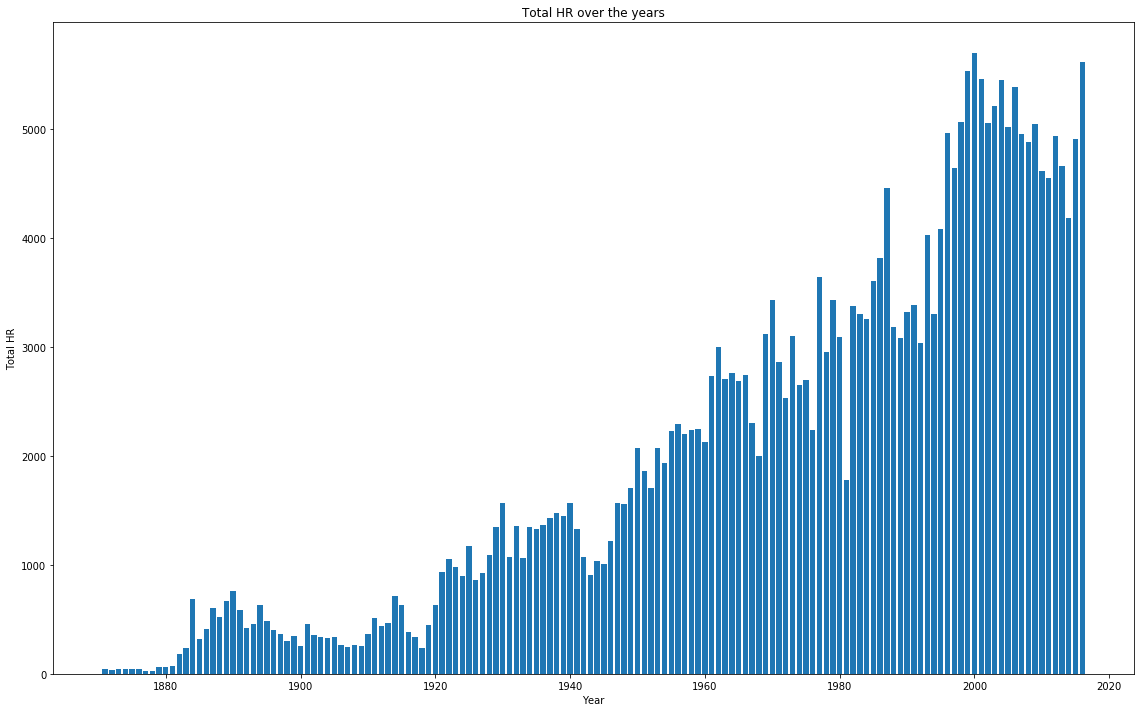

In [320]:
# Bonus 1: Sum up HR for every season
tot_HR_per_season = batting.groupby('yearID').sum()['HR'].reset_index()
fig, axes = plt.subplots(figsize=(16,10))
axes.bar(tot_HR_per_season['yearID'],tot_HR_per_season['HR'], align="center")
axes.set_title("Total HR over the years")
axes.set_ylabel("Total HR")
axes.set_xlabel("Year")
fig.tight_layout()

In [ ]:
# Bonus 2: Using a line graph please graph the average HRs per AB (think about this) per season

